## Import library

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [102]:
df = pd.read_csv("BBC_News_Summary.csv")
df.head()

,Unnamed: 0,articles,summaries,categories
0,0,Escaped prisoner report ordered\r\n\r\nFirst M...,He held each of the major offices of chancello...,politics
1,1,Hospital suspends 'no Welsh' plan\r\n\r\nAn En...,Tony Blair is likely to name 5 May as election...,politics
2,2,'No-one can define new hunt ban'\r\n\r\nThe ne...,Tory co-chairman Liam Fox has opened proceedin...,politics
3,3,Police urge pub closure power\r\n\r\nNew power...,Labour election coordinator Alan Milburn claim...,politics
4,4,Blunkett tells of love and pain\r\n\r\nDavid B...,"In a statement, he said abortion was a ""very k...",politics


## Remove '\r\n'

In [103]:
df = df.replace(r'\r\n\r\n',' ', regex=True)
df.head()

,Unnamed: 0,articles,summaries,categories
0,0,Escaped prisoner report ordered First Minister...,He held each of the major offices of chancello...,politics
1,1,Hospital suspends 'no Welsh' plan An English h...,Tony Blair is likely to name 5 May as election...,politics
2,2,'No-one can define new hunt ban' The new law b...,Tory co-chairman Liam Fox has opened proceedin...,politics
3,3,Police urge pub closure power New powers are n...,Labour election coordinator Alan Milburn claim...,politics
4,4,Blunkett tells of love and pain David Blunkett...,"In a statement, he said abortion was a ""very k...",politics


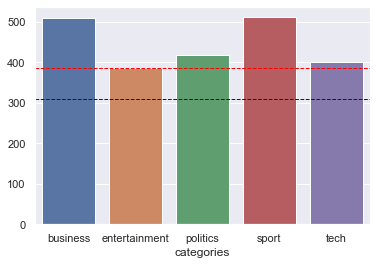

In [104]:
plt.figure(figsize=(6,4))

category_sizes = df.groupby('categories').size()
sns.barplot(x=category_sizes.index, y= category_sizes)
min_val = category_sizes.min()
plt.axhline(y=min_val,color='red',ls='--', lw=1)
plt.axhline(y=int(min_val*0.8),color='blue',ls='--', lw=1)
plt.show()

In [105]:
#-- get length of each article and summary for analysis
df['articles_length'] = df['articles'].apply(lambda x : len(x.split()))
df['summaries_length'] = df['summaries'].apply(lambda x : len(x.split()))

In [106]:
category_length = df.groupby('categories',0).agg(
    {'articles_length':['mean', 'max'],'summaries_length':['mean', 'max']})
print(type(category_length))
category_length

<class 'pandas.core.frame.DataFrame'>


articles_length       summaries_length      
                         mean   max             mean   max
categories                                                
business           328.880392   891       139.929412   403
entertainment      330.621762  3482       144.049223  1706
politics           453.973621  4432       195.709832  2073
sport              329.262231  1662       143.187867   659
tech               502.695761  2969       213.837905  1430

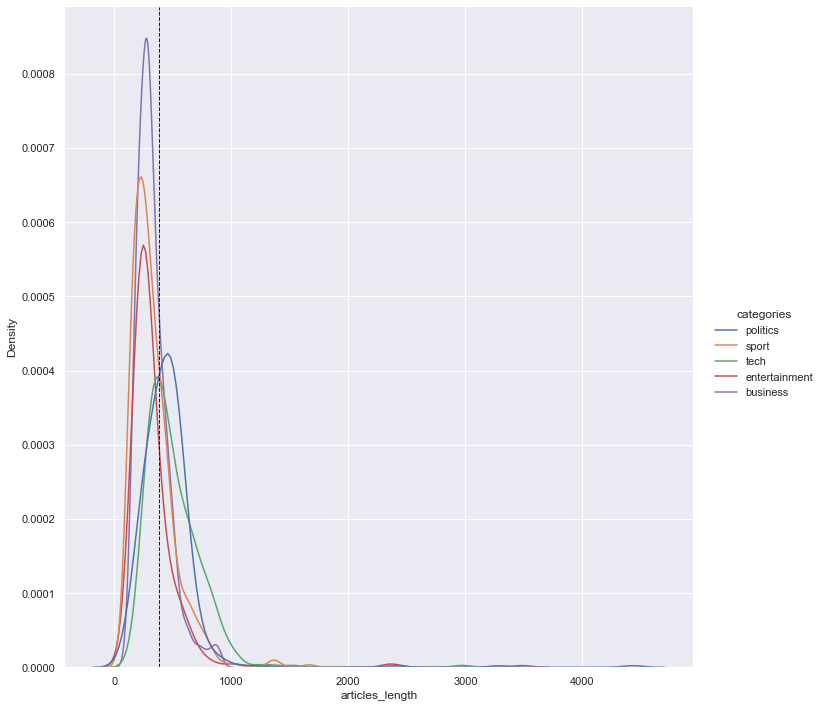

In [107]:
sns.displot(
    data = df, 
    x = 'articles_length', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "categories",
    height = 10,
    aspect = 1
    )
plt.axvline(x=df.articles_length.mean(),
            color='blue',
            ls='--', 
            lw=1)

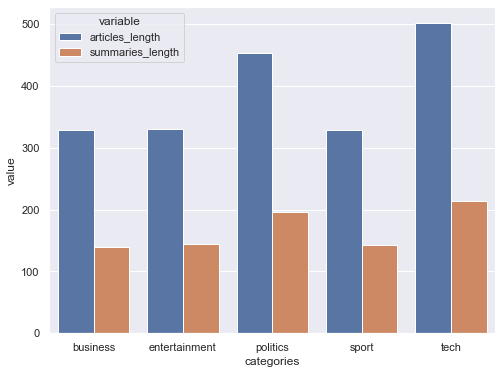

In [108]:
category_length = df.groupby('categories',0).agg( {'articles_length':'mean', 'summaries_length':'mean'} )
df_m = pd.melt(category_length,ignore_index=False)
plt.figure(figsize=(8,6))
sns.barplot(x=df_m.index, y="value",hue='variable', data= df_m)
plt.show()